In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import mannwhitneyu

In [233]:
patient_df = pd.read_csv('xuanye_work_ljn.csv')
# patient_df = patient_df[:-1]

In [234]:
patient_df['VitK2_clean'] = patient_df['VitK2（ng/ml）'].apply(lambda x: x if x != ">8.0" else 8.0)
patient_df['VitK2_clean'] = patient_df['VitK2_clean'].astype(float)


patient_df['VitD_clean'] = patient_df['VitD 25-OH（ng/ml）'].apply(lambda x: x if x != ">8.0" else 8.0)
patient_df['VitD_clean'] = patient_df['VitD_clean'].astype(float)

patient_df.drop(["Unnamed: 20"], inplace=True, axis=1)

In [235]:
patient_df.columns.tolist()

['位置',
 '类型',
 '来源',
 ' 病人ID',
 '病人姓名',
 '性别',
 '年龄',
 'PD分期',
 '病程',
 '入库时间',
 '检测样本编号',
 'VitK2（ng/ml）',
 'VitD 25-OH（ng/ml）',
 '总胆固醇TC',
 'HDL-C',
 'LDL-C',
 'CRP',
 '血尿酸',
 'WBC计数',
 '中性粒细胞比值',
 'VitK2_clean',
 'VitD_clean']

In [236]:
patient_df.columns = ["Position", "Type", "Source", "Patient ID", "Patient Name", "Gender", "Age", "PD stage", "Course of disease",
                     "Entry time", "sample ID", "VitK2(ng/ml)", "VitD 25-OH(ng/ml)", "Total cholesterol", "HDL-C", "LDL-C",
                     "CRP", "Uric acid", "White blood cell", "Ratio of neutrophil", "VitK2_clean", "VitD_clean"]

In [237]:
patient_df.to_csv("xuan_pd_clean.csv", index=False)

## statistics about patients
1. Number of patients and controls
2. number of male and female
3. PD stage
4. age distribution

In [238]:
control_df = patient_df.loc[patient_df.Type != "PD"]
control_df.reset_index(inplace=True, drop=True)
case_df = patient_df.loc[patient_df.Type == "PD"]
case_df.reset_index(inplace=True, drop=True)

In [239]:
print("The number of controls: {}".format(control_df.shape[0]))
print("The number of cases: {}".format(case_df.shape[0]))

The number of controls: 110
The number of cases: 92


In [240]:
print("The number of female controls: {}".format(control_df.loc[control_df.Gender == "女"].shape[0]))
print("The number of male controls: {}".format(control_df.loc[control_df.Gender == "男"].shape[0]))

The number of female controls: 0
The number of male controls: 0


In [241]:
print("The number of female cases: {}".format(case_df.loc[case_df.Gender == "女"].shape[0]))
print("The number of male cases: {}".format(case_df.loc[case_df.Gender == "男"].shape[0]))

The number of female cases: 0
The number of male cases: 0


In [242]:
df = case_df.groupby('PD stage')['Position'].count()
display(df)

PD stage
1.0     8
1.5     6
2.0    21
2.5     6
3.0    29
4.0    12
5.0    10
Name: Position, dtype: int64

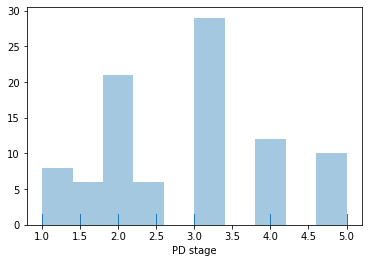

In [243]:
### PD stage distribution 
sns.distplot(case_df['PD stage'].astype(float), axlabel="PD stage", kde=False, rug=True)
plt.show()

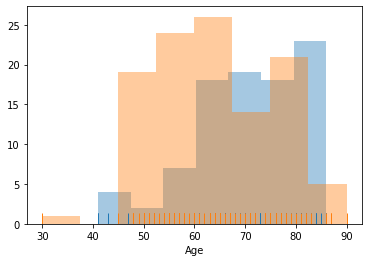

In [244]:
fig, ax = plt.subplots()
for a in [case_df, control_df]:
    a = a.loc[a.Age != 0]
    sns.distplot(a.Age.astype(float), axlabel="Age", kde=False, rug=True)
plt.show()

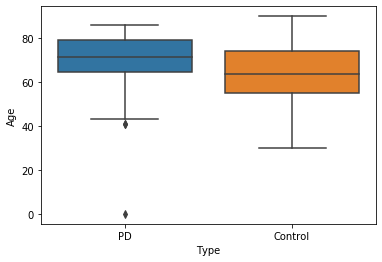

In [245]:
### boxplot 
patient_df['Age'] = patient_df.Age.astype(float)
sns.boxplot(x = "Type", y = 'Age', data=patient_df)
plt.show()

In [246]:
### statistics testing
print(np.mean(case_df.Age.astype(float)))
print(np.std(case_df.Age.astype(float)))
print(np.mean(control_df.Age.astype(float)))
print(np.std(control_df.Age.astype(float)))

mannwhitneyu(case_df.Age.astype(float), control_df.Age.astype(float))

69.92391304347827
12.578651423925082
63.92727272727273
11.306240506028752


MannwhitneyuResult(statistic=3295.5, pvalue=9.95768321138408e-06)

## examine the association of the data

Examine if VD and VD concentration is normal distributed

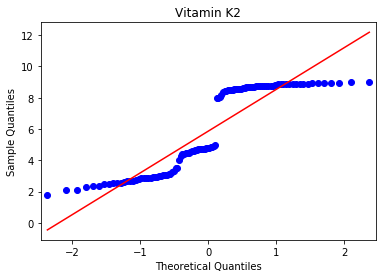

In [247]:
### Generate QQ plot

qqplot(control_df['VitK2_clean'].astype(float), line='s')
plt.title('Vitamin K2')
plt.show()

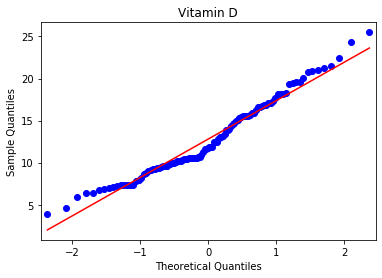

In [248]:
qqplot(control_df['VitD_clean'].astype(float), line='s')
plt.title('Vitamin D')
plt.show()

In [249]:
# Use statistical test

stat, p = shapiro(control_df['VitK2_clean'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.805, p=0.000
Sample does not look Gaussian (reject H0)


In [250]:
stat, p = mannwhitneyu(case_df['VitK2_clean'].astype(float), control_df['VitK2_clean'].astype(float))

print(stat, p)

2669.5 3.814854745178946e-09


In [251]:
print(np.mean(case_df['VitK2_clean'].astype(float)))
print(np.std(case_df['VitK2_clean'].astype(float)))
print(np.mean(control_df['VitK2_clean'].astype(float)))
print(np.std(control_df['VitK2_clean'].astype(float)))
print(stats.ttest_ind(case_df['VitK2_clean'].astype(float), control_df['VitK2_clean'].astype(float)))


print(np.mean(case_df['VitD_clean'].astype(float)))
print(np.std(case_df['VitD_clean'].astype(float)))
print(np.mean(control_df['VitD_clean'].astype(float)))
print(np.std(control_df['VitD_clean'].astype(float)))
print(stats.ttest_ind(case_df['VitD_clean'].astype(float), control_df['VitD_clean'].astype(float)))

3.6748163043478255
1.8641264180917683
5.867352181818182
2.669850716433882
Ttest_indResult(statistic=-6.605921124558233, pvalue=3.4948626244888804e-10)
11.398913043478261
4.793598416121991
12.812727272727274
4.5701026264766655
Ttest_indResult(statistic=-2.1307384870233106, pvalue=0.034331966555129656)


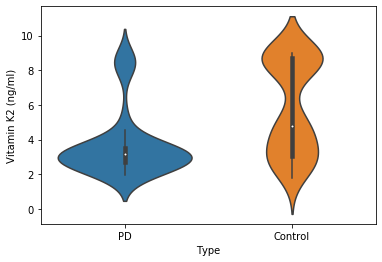

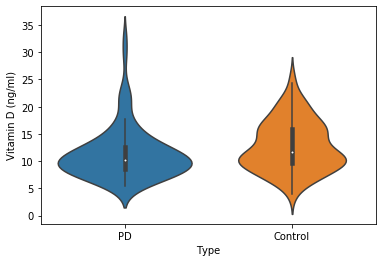

In [290]:
### add a boxplot here
sns.violinplot(x = "Type", y = 'VitK2_clean', data=patient_df)
plt.ylabel("Vitamin K2 (ng/ml)")
plt.show()

sns.violinplot(x = "Type", y = 'VitD_clean', data=patient_df)
plt.ylabel("Vitamin D (ng/ml)")
plt.show()

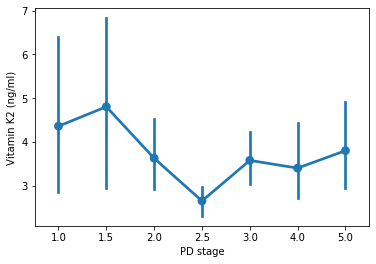

In [279]:
### corelation of the PD stage and the VK2 data

sns.pointplot(data=case_df, x=case_df['PD stage'].astype(float), y = case_df['VitK2_clean'].astype(float))
plt.ylabel("Vitamin K2 (ng/ml)")
plt.show()

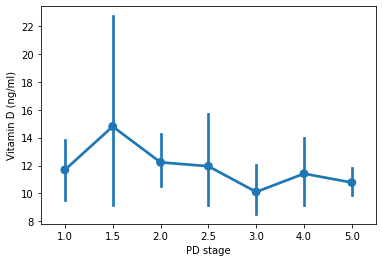

In [254]:
sns.pointplot(data=case_df, x=case_df['PD stage'].astype(float), y = case_df['VitD_clean'].astype(float))
plt.ylabel("Vitamin D (ng/ml)")
plt.show()

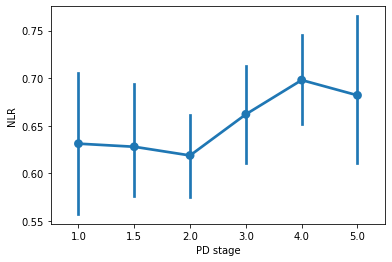

In [286]:
sns.pointplot(data=case_df, x=case_df.loc[case_df["PD stage"] != 2.5]['PD stage'].astype(float), 
              y = case_df.loc[case_df["PD stage"] != 2.5]['Ratio of neutrophil'].astype(float))
plt.ylabel("NLR")
plt.show()

In [288]:
case_tmp = case_df.dropna(subset=["Ratio of neutrophil"])
print("correlation {}".format(stats.spearmanr(case_tmp.loc[(case_tmp["PD stage"] != 2.5)]['PD stage'].astype(float), 
                                              case_tmp.loc[case_tmp["PD stage"] != 2.5]['Ratio of neutrophil'].astype(float))))

correlation SpearmanrResult(correlation=0.21916019080367982, pvalue=0.0704062586587215)


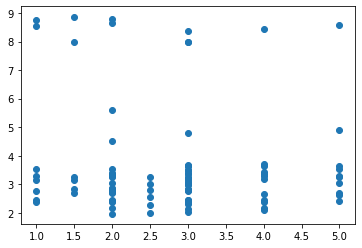

In [255]:
plt.scatter(case_df['PD stage'].astype(float), case_df['VitK2_clean'].astype(float))
plt.show()

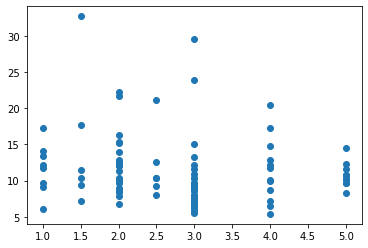

In [256]:
plt.scatter(case_df['PD stage'].astype(float), case_df['VitD_clean'].astype(float))
plt.show()

In [257]:
print("no correlation found between different stage of the PD and vitamin K2 concentration")
print("correlation {}".format(stats.spearmanr(case_df['PD stage'].astype(float), case_df['VitK2_clean'].astype(float))))

no correlation found between different stage of the PD and vitamin K2 concentration
correlation SpearmanrResult(correlation=0.0011886357929522904, pvalue=0.9910278862293218)


In [258]:
print("no correlation found between different stage of the PD and vitamin K2 concentration")
print("correlation {}".format(stats.spearmanr(case_df['PD stage'].astype(float), case_df['VitD_clean'].astype(float))))

no correlation found between different stage of the PD and vitamin K2 concentration
correlation SpearmanrResult(correlation=-0.1498164455057568, pvalue=0.15404163781702046)


In [259]:
patient_df['White blood cell'] = patient_df['White blood cell'].astype(float)

patient_df['Ratio of neutrophil'] = patient_df['Ratio of neutrophil'].astype(float)


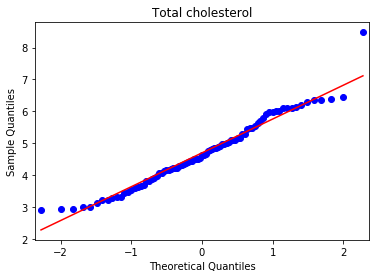

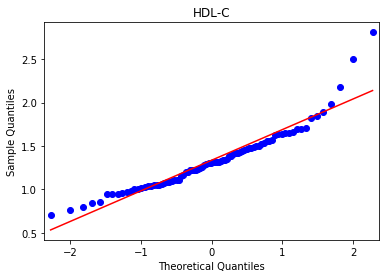

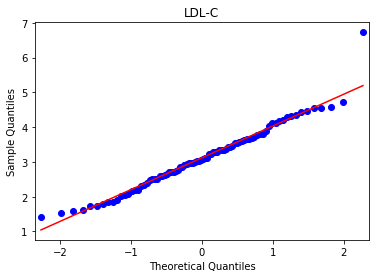

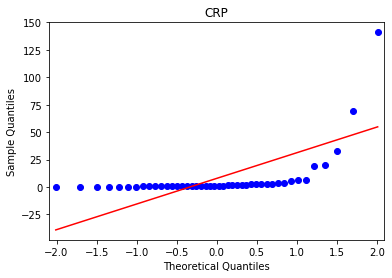

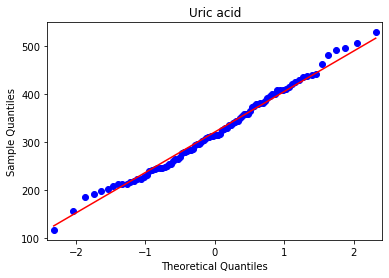

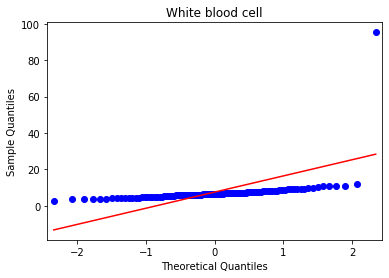

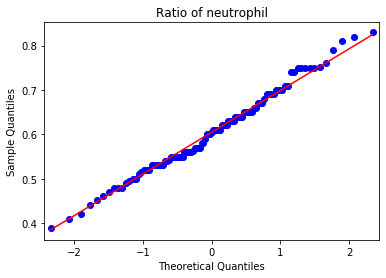

In [260]:
par_list = ['Total cholesterol', 'HDL-C', 'LDL-C', 'CRP', 'Uric acid', 'White blood cell', 'Ratio of neutrophil']
for i in par_list:
    qqplot(control_df[i].dropna().astype(float), line='s')
    plt.title(i)
    plt.show()

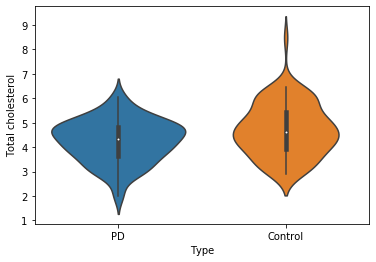

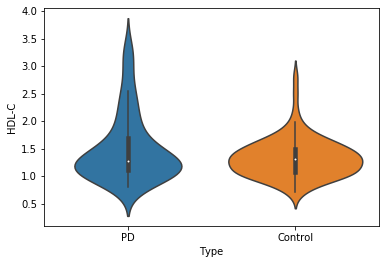

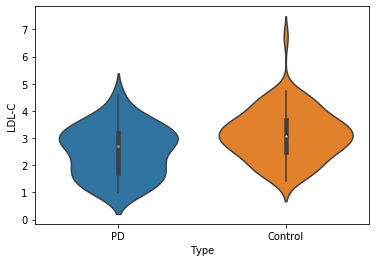

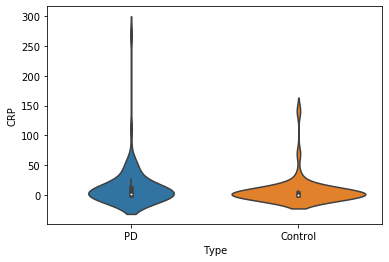

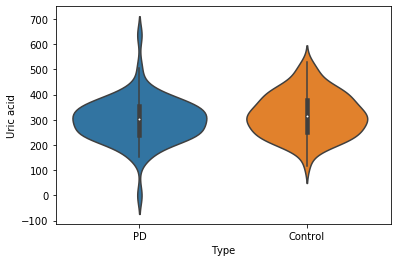

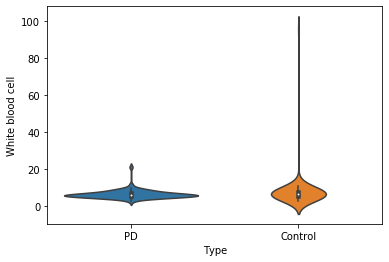

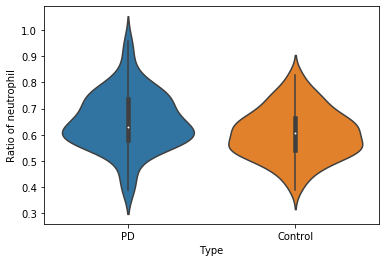

In [289]:
sns.violinplot(x = "Type", y = 'Total cholesterol', data=patient_df.dropna(subset=["Total cholesterol"]))
plt.show()

sns.violinplot(x = "Type", y = 'HDL-C', data=patient_df.dropna(subset=["HDL-C"]))
plt.show()

sns.violinplot(x = "Type", y = 'LDL-C', data=patient_df.dropna(subset=["LDL-C"]))
plt.show()


sns.violinplot(x = "Type", y = 'CRP', data=patient_df.dropna(subset=["CRP"]))
plt.show()


sns.violinplot(x = "Type", y = 'Uric acid', data=patient_df.dropna(subset=["Uric acid"]))
plt.show()

sns.violinplot(x = "Type", y = 'White blood cell', data=patient_df.dropna(subset=["White blood cell"]))
plt.show()


sns.violinplot(x = "Type", y = 'Ratio of neutrophil', data=patient_df.dropna(subset=["Ratio of neutrophil"]))
# plt.ylim(0, 2)
plt.show()

In [262]:
for i in par_list:
    stat, p = mannwhitneyu(case_df[i].dropna().astype(float), control_df[i].dropna().astype(float))
    print(i)
    print(np.mean(case_df[i].dropna().astype(float)))
    print(np.std(case_df[i].dropna().astype(float)))
    
    print(np.mean(control_df[i].dropna().astype(float)))
    print(np.std(control_df[i].dropna().astype(float)))
    print("Mann White resutls:", stat, p)

Total cholesterol
4.2541095890410965
0.8562675225547346
4.697471264367816
1.060658241068572
Mann White resutls: 2467.5 0.007679271464455224
HDL-C
1.5094444444444446
0.6068769985409108
1.3361627906976745
0.35296474757980073
Mann White resutls: 2864.0 0.20945863297346118
LDL-C
2.518714285714286
0.9193505804620555
3.119883720930233
0.9127501175989255
Mann White resutls: 2009.5 0.00018305321895170515
CRP
14.421714285714282
36.23540663776359
7.892499999999999
23.37635306001267
Mann White resutls: 1364.5 0.15418576327368783
Uric acid
299.00694444444446
86.62787485431402
320.4793814432989
84.16725241445648
Mann White resutls: 2994.0 0.05686464015998215
White blood cell
6.463513513513513
2.298595007080225
7.520291262135924
8.889861407102838
Mann White resutls: 3313.5 0.06968798613465921
Ratio of neutrophil
0.651445945945946
0.10908751035749728
0.6046990291262138
0.09399512845788704
Mann White resutls: 2815.5 0.0015333366893267824


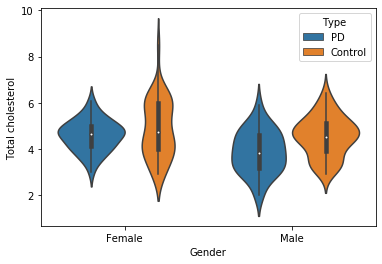

In [268]:
sns.violinplot(x = "Gender", y = 'Total cholesterol', data=patient_df.dropna(subset=["Total cholesterol"]), hue="Type")
plt.show()

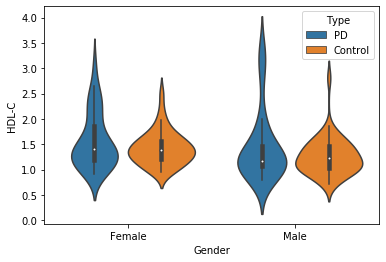

In [269]:
sns.violinplot(x = "Gender", y = 'HDL-C', data=patient_df.dropna(subset=["Total cholesterol"]), hue="Type")
plt.show()

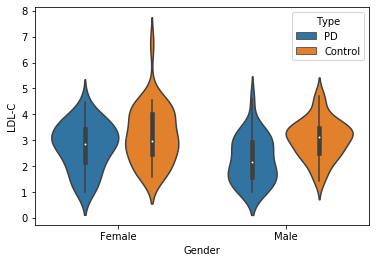

In [267]:
sns.violinplot(x = "Gender", y = 'LDL-C', data=patient_df.dropna(subset=["Total cholesterol"]), hue="Type")
plt.show()

In [270]:
for i in par_list:
    stat, p = mannwhitneyu(case_df.loc[case_df.Gender == "Female"][i].dropna().astype(float), 
                           control_df.loc[control_df.Gender == "Female"][i].dropna().astype(float))
    print("Female", i)
    print(np.mean(case_df.loc[case_df.Gender == "Female"][i].dropna().astype(float)))
    print(np.std(case_df.loc[case_df.Gender == "Female"][i].dropna().astype(float)))
    
    print(np.mean(control_df.loc[control_df.Gender == "Female"][i].dropna().astype(float)))
    print(np.std(control_df.loc[control_df.Gender == "Female"][i].dropna().astype(float)))
    print("Mann White resutls:", stat, p)

Female Total cholesterol
4.586923076923077
0.6546251769432402
4.857619047619047
1.2278704164679546
Mann White resutls: 731.0 0.20407625457038142
Female HDL-C
1.5644736842105265
0.5342909584251334
1.4234146341463416
0.3262096419751401
Mann White resutls: 721.5 0.28794022155091104
Female LDL-C
2.763783783783784
0.8898811076110001
3.189756097560976
1.0595155077880207
Mann White resutls: 606.5 0.06475098784696824
Female CRP
14.763846153846153
43.195648559060544
5.846
15.240661862268318
Mann White resutls: 328.5 0.16430680275011122
Female Uric acid
272.33076923076925
86.22917036876329
297.33000000000004
81.30587494148256
Mann White resutls: 845.0 0.14211709196894534
Female White blood cell
6.26975
1.411011140104854
8.089019607843138
12.445958672361296
Mann White resutls: 922.5 0.2189780101466854
Female Ratio of neutrophil
0.6414
0.10230195501553231
0.6028431372549021
0.10447935766644494
Mann White resutls: 780.5 0.027923652615422463


In [271]:
for i in par_list:
    stat, p = mannwhitneyu(case_df.loc[case_df.Gender == "Male"][i].dropna().astype(float), 
                           control_df.loc[control_df.Gender == "Male"][i].dropna().astype(float))
    print("Male", i)
    print(np.mean(case_df.loc[case_df.Gender == "Male"][i].dropna().astype(float)))
    print(np.std(case_df.loc[case_df.Gender == "Male"][i].dropna().astype(float)))
    
    print(np.mean(control_df.loc[control_df.Gender == "Male"][i].dropna().astype(float)))
    print(np.std(control_df.loc[control_df.Gender == "Male"][i].dropna().astype(float)))
    print("Mann White resutls:", stat, p)

Male Total cholesterol
3.8723529411764703
0.8999250257122057
4.548
0.8494458324238351
Mann White resutls: 447.5 0.0008478018550110666
Male HDL-C
1.447941176470588
0.6735803345763798
1.2566666666666668
0.3576093461368766
Mann White resutls: 705.5 0.27951494236805735
Male LDL-C
2.2439393939393932
0.8730092137176997
3.0562222222222224
0.7489200784800853
Mann White resutls: 358.0 5.1373015337758276e-05
Male CRP
13.991290322580646
24.84229104051233
9.597916666666666
28.317286678394684
Mann White resutls: 325.5 0.217481479715939
Male Uric acid
330.53333333333336
75.83483115403908
345.10638297872345
80.07022291436097
Mann White resutls: 669.0 0.1501019030660396
Male White blood cell
6.691470588235295
3.0101554897819414
6.9624999999999995
1.9970236266465689
Mann White resutls: 753.0 0.12451874479890496
Male Ratio of neutrophil
0.6632647058823529
0.1154521313648137
0.6065192307692308
0.08238663315420292
Mann White resutls: 637.0 0.01463407469286703
